# EDA on Titanic Dataset

The goal of this excercise is for you to get familiarized with the Titanic Dataset we are going to use for some of the classification models.

Imports...

In [7]:
%matplotlib inline
import pandas as pd
import pylab as plt
import numpy as np
plt.style.use('ggplot')

## Load the Titanic Data

In [8]:
df = pd.read_csv('/Users/filippofrezza/Desktop/IE/2nd term/python/data/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The following are the field descriptions:

<table>
<tr><th>Field</th>
<th>Descriptions</th>
</tr>
<tr><td>survival</td>
<td>Survival(0 = No; 1 = Yes)</td>
</tr>
<tr><td>pclass</td>
<td>Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)</td>
</tr>
<tr><td>name</td>
<td>Name of the passenger</td>
</tr>
<tr><td>sex</td>
<td>Gender of the passenger</td>
</tr>
<tr><td>age</td>
<td>Age of the passenger</td>
</tr>
<tr><td>sibsp</td>
<td>Number of Siblings/Spouses Aboard</td>
</tr>
<tr><td>parch</td>
<td>Number of Parents/Children Aboard</td>
</tr>
<tr><td>ticket</td>
<td>Ticket Number</td>
</tr>
<tr><td>fare</td>
<td>Passenger Fare</td>
</tr>
<tr><td>cabin</td>
<td>Cabin</td>
</tr>
<tr><td>embarked</td>
<td>Port of Embarkation
(C = Cherbourg; Q = Queenstown; S = Southampton)
</td></tr>
</table>


##  Which passenger class had the maximum survivors?

(Tip: Check if there is any null values)

In [3]:
df['Pclass'].isnull().value_counts()

False    891
Name: Pclass, dtype: int64

In [4]:
df['Survived'].isnull().value_counts()

False    891
Name: Survived, dtype: int64

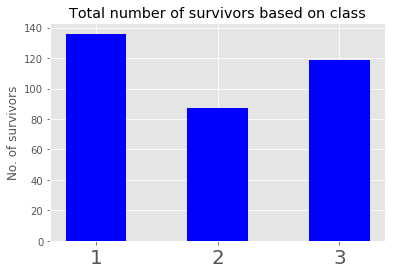

In [5]:
#Passengers survived in each class
survivors = df.groupby('Pclass')['Survived'].agg(sum)

#Total Passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers


#Plotting the Total number of survivors
fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)

plt.show()

In [6]:
survivors

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

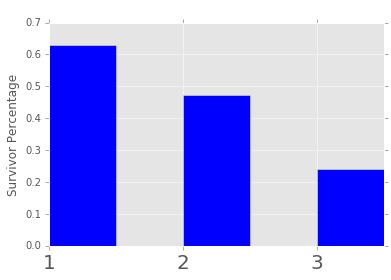

In [48]:
#Plotting the percentage of survivors in each class

fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()


## What was the distribution based on gender for the survivors among the class?

In [27]:
#Checking for any null values
df['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

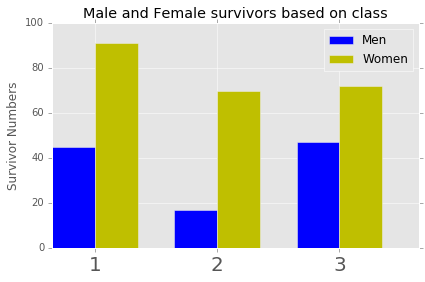

In [28]:
# Male Passengers survived in each class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)

#Total Male Passengers in each class
male_total_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / male_total_passengers

# Female Passengers survived in each class
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)

#Total Female Passengers in each class
female_total_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors / female_total_passengers

#Plotting the total passengers who survived based on Gender 
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35

rect1 = ax.bar(index, male_survivors, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='y', label='Women')

ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()


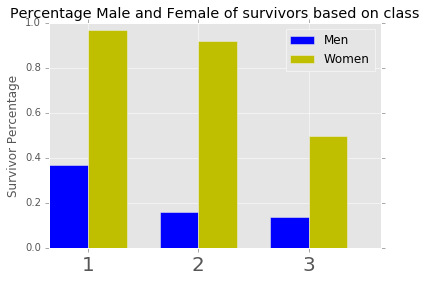

In [29]:
#Plotting the percentage of passengers who survived based on Gender 
fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35

rect1 = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='Men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='y', label='Women')

ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage Male and Female of survivors based on class')
xTickMarks = male_survivor_percentage.index.values.tolist()
ax.set_xticks(index + bar_width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

## What is the distribution of the non survivors among classes having family relative aboard the ship?

In [30]:
#Checking for the null values
df['SibSp'].isnull().value_counts()

False    891
Name: SibSp, dtype: int64

In [31]:
#Checking for the null values
df['Parch'].isnull().value_counts()

False    891
Name: Parch, dtype: int64

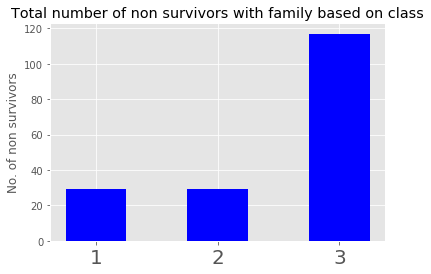

In [7]:
#Total number of non-survivors in each class
non_survivors = df[((df['SibSp'] > 0) | (df['Parch'] > 0)) & (df['Survived'] == 0)].groupby('Pclass')['Survived'].agg('count')

#Total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
non_survivor_percentage = non_survivors / total_passengers

#Total number of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.bar(non_survivors.index.values.tolist(), non_survivors, color='blue', width=0.5)
ax.set_ylabel('No. of non survivors')
ax.set_title('Total number of non survivors with family based on class')
xTickMarks = non_survivors.index.values.tolist()
ax.set_xticks(non_survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)

plt.show()


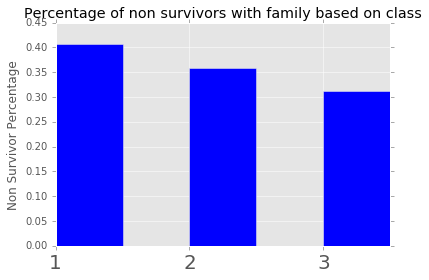

In [33]:
#Plot of percentage of non survivors with family based on class
fig = plt.figure()
ax = fig.add_subplot(111)

rect = ax.bar(non_survivor_percentage.index.values.tolist(), non_survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Non Survivor Percentage')
ax.set_title('Percentage of non survivors with family based on class')
xTickMarks = non_survivor_percentage.index.values.tolist()
ax.set_xticks(non_survivor_percentage.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()


## What was the survival percentage among different age groups?

In [34]:
#Checking for null values
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

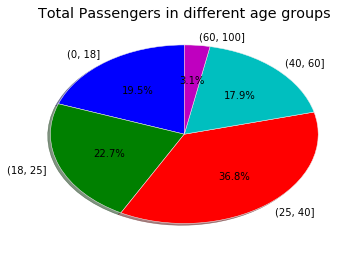

In [35]:
#Defining the age binning interval
age_bin = [0, 18, 25, 40, 60, 100]

#Creating the bins
df['AgeBin'] = pd.cut(df.Age, bins=age_bin)

#Removing the null rows
d_temp = df[np.isfinite(df['Age'])]  # removing all na instances

#Number of survivors based on Age bin
survivors = d_temp.groupby('AgeBin')['Survived'].agg(sum)

#Total passengers in each bin
total_passengers = d_temp.groupby('AgeBin')['Survived'].agg('count')

#Plotting the pie chart of total passengers in each bin
plt.pie(total_passengers, labels=total_passengers.index.values,
    autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Total Passengers in different age groups')
plt.show()



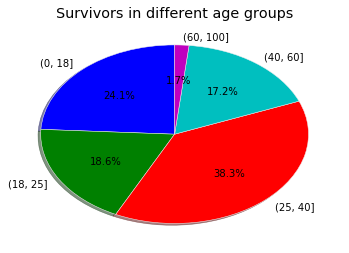

In [36]:
#Plotting the pie chart of percentage passengers in each bin
plt.pie(survivors, labels=survivors.index.values,
    autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Survivors in different age groups')
plt.show()